<a href="https://colab.research.google.com/github/andrnsgnmez/Microproyecto-1/blob/main/Miniproyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESCRIPCIÓN DEL DATASET**

El conjunto de datos contiene información sobre diferentes mezclas de hormigón y su resistencia a la compresión. La resistencia a la compresión es una propiedad importante del hormigón y se utiliza para evaluar su calidad y capacidad para soportar cargas.


---


**CARACTERISTICAS O ATRIBUTOS**


---


Cemento (componente 1): La cantidad de cemento en la mezcla, medida en kilogramos por metro cúbico (kg/m³). El cemento es uno de los componentes principales del hormigón.

Escoria de alto horno (componente 2): La cantidad de escoria de alto horno en la mezcla, medida en kg/m³. La escoria es un subproducto de la industria del acero y se utiliza en la fabricación de hormigón.

Cenizas volantes (componente 3): La cantidad de cenizas volantes en la mezcla, medida en kg/m³. Las cenizas volantes son un subproducto de la quema de carbón y se utilizan como aditivo en el hormigón.

Agua (componente 4): La cantidad de agua en la mezcla, medida en kg/m³. El agua es esencial en la hidratación del cemento y la formación del hormigón.

Superplastificante (componente 5): La cantidad de superplastificante en la mezcla, medida en kg/m³. Los superplastificantes se utilizan para mejorar la trabajabilidad del hormigón.

Agregado grueso (componente 6): La cantidad de agregado grueso en la mezcla, medida en kg/m³. El agregado grueso consiste en piedras trituradas y se utiliza para darle al hormigón resistencia y durabilidad.

Agregado fino (componente 7): La cantidad de agregado fino en la mezcla, medida en kg/m³. El agregado fino suele ser arena y se utiliza para mejorar la textura del hormigón.

Edad (día) (componente 8): La edad del hormigón en días cuando se realizó la prueba de resistencia a la compresión. La edad del hormigón puede influir en sus propiedades mecánicas.

Resistencia a la Compresión del Hormigón: La resistencia a la compresión del hormigón en megapascales (MPa). Esta es la variable objetivo que se desea predecir.

# **ANALISIS EXPLORATORIO DE LOS DATOS**

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Hacemos el llamado a nuestra hoja de excel
df = pd.read_excel('/content/Concrete_Data.xlsx')

## Exploración Inicial:


Comenzamos con una exploración inicial de los datos. obtenemos una vista previa  del DataFrame usando

---


```
# head():
```

☣

In [ ]:
# Head nos da una vista previa de las filas de nuestro dataset
df.head(8)

,Cemento (componente 1)(kg en una mezcla m^3),Escoria de alto horno (componente 2)(kg en una mezcla m^3),Cenizas volantes (componente 3)(kg en una mezcla m^3,Agua (componente 4)(kg en una mezcla m^3),Superplastificante (componente 5)(kg en una mezcla m^3),Agregado grueso (componente 6)(kg en una mezcla m^3),Agregado fino (componente 7)(kg en una mezcla m^3),Edad (día),"Resistencia a la compresión del hormigón (MPa, megapascales)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770


In [ ]:
df.shape #tamaño del dataset

(1030, 9)

In [ ]:
df.info()#infomraciòn del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Cemento (componente 1)(kg en una mezcla m^3)                  1030 non-null   float64
 1   Escoria de alto horno (componente 2)(kg en una mezcla m^3)    1030 non-null   float64
 2   Cenizas volantes (componente 3)(kg en una mezcla m^3          1030 non-null   float64
 3   Agua (componente 4)(kg en una mezcla m^3)                     1030 non-null   float64
 4   Superplastificante (componente 5)(kg en una mezcla m^3)       1030 non-null   float64
 5   Agregado grueso (componente 6)(kg en una mezcla m^3)          1030 non-null   float64
 6   Agregado fino (componente 7)(kg en una mezcla m^3)            1030 non-null   float64
 7   Edad (día)                                                    1030 non

Estadísticas Descriptivas: aqui se calculan estadísticas descriptivas para las variables numéricas utilizando. Esto nos dará información sobre la distribución de cada característica:

In [ ]:
df.describe(include='all') # informaciòn estadistica y general del datset

,Cemento (componente 1)(kg en una mezcla m^3),Escoria de alto horno (componente 2)(kg en una mezcla m^3),Cenizas volantes (componente 3)(kg en una mezcla m^3,Agua (componente 4)(kg en una mezcla m^3),Superplastificante (componente 5)(kg en una mezcla m^3),Agregado grueso (componente 6)(kg en una mezcla m^3),Agregado fino (componente 7)(kg en una mezcla m^3),Edad (día),"Resistencia a la compresión del hormigón (MPa, megapascales)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225




---





---



---



---



## Verificación de datos faltantes
Usaremos una técnica ampliamente utilizada en la manipulación y limpieza de datos en Python, con la biblioteca pandas
1. ".isna()": Este es un método que se aplica al DataFrame y devuelve un DataFrame de la misma forma, pero con valores booleanos (True o False) que indican si cada celda del DataFrame original contiene un valor faltante (NaN). True significa que hay un valor faltante, y False significa que no lo hay.

2. ".sum()": Finalmente, se aplica el método "sum()" al DataFrame booleano resultante de ".isna()". Este método suma los valores booleanos a lo largo de las filas o columnas, dependiendo de cómo se aplique. Por defecto, suma a lo largo de las columnas, lo que significa que obtendrás la cantidad de valores faltantes en cada columna del DataFrame original.


---
para terminar la verificacion miramos su tenemos filas duplicadas para asi eliminarlas.


*   ".duplicated()": Este es el método que se aplica al DataFrame "df". Cuando se llama a este método, se escanea el DataFrame para buscar filas que sean duplicadas en función de todas sus columnas. El resultado de esta operación es una serie booleana (una columna de valores True o False) que tiene el mismo número de filas que el DataFrame original.

Si una fila se considera duplicada, se marca como "True" en la serie resultante.
Si una fila no se considera duplicada, se marca como "False".




In [ ]:
df.isna().sum()#cantidad de valores NAN (Not a Numbe)

Cemento (componente 1)(kg en una mezcla m^3)                    0
Escoria de alto horno (componente 2)(kg en una mezcla m^3)      0
Cenizas volantes (componente 3)(kg en una mezcla m^3            0
Agua (componente 4)(kg en una mezcla m^3)                       0
Superplastificante (componente 5)(kg en una mezcla m^3)         0
Agregado grueso (componente 6)(kg en una mezcla m^3)            0
Agregado fino (componente 7)(kg en una mezcla m^3)              0
Edad (día)                                                      0
Resistencia a la compresión del hormigón (MPa, megapascales)    0
dtype: int64

In [ ]:
df.duplicated() #Cantidad de valores duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

## Correlación de Variables:
Calculamos la matriz de correlación entre todas las variables numéricas. Esto nos ayuda a identificar las relaciones lineales entre las variables y su impacto en la variable objetivo.

In [ ]:
correlation_matrix = df.corr()
print(df.corr())

                                                    Cemento (componente 1)(kg en una mezcla m^3)  \
Cemento (componente 1)(kg en una mezcla m^3)                                            1.000000   
Escoria de alto horno (componente 2)(kg en una ...                                     -0.275193   
Cenizas volantes (componente 3)(kg en una mezcl...                                     -0.397475   
Agua (componente 4)(kg en una mezcla m^3)                                              -0.081544   
Superplastificante (componente 5)(kg en una mez...                                      0.092771   
Agregado grueso (componente 6)(kg en una mezcla...                                     -0.109356   
Agregado fino (componente 7)(kg en una mezcla m^3)                                     -0.222720   
Edad (día)                                                                              0.081947   
Resistencia a la compresión del hormigón (MPa, ...                                      0.497833   


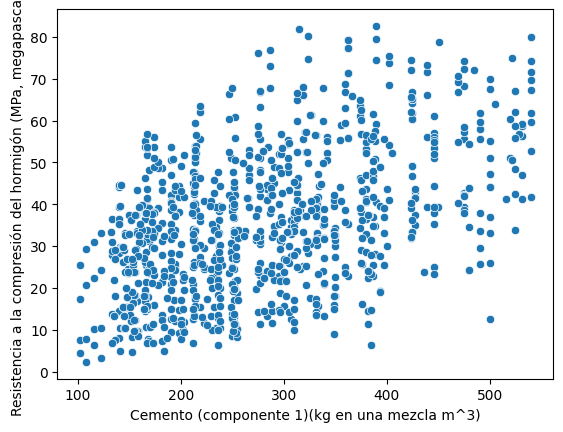

In [ ]:
#Aqui podemos ver una grafica de comparacion de el cemento y la resistencia a la compresion
#DESPUES DE ESTO VEMOS LAS DEMAS GRAFICAS EN MATRIZ
sns.scatterplot(x='Cemento (componente 1)(kg en una mezcla m^3)', y='Resistencia a la compresión del hormigón (MPa, megapascales)', data=df)
plt.show()

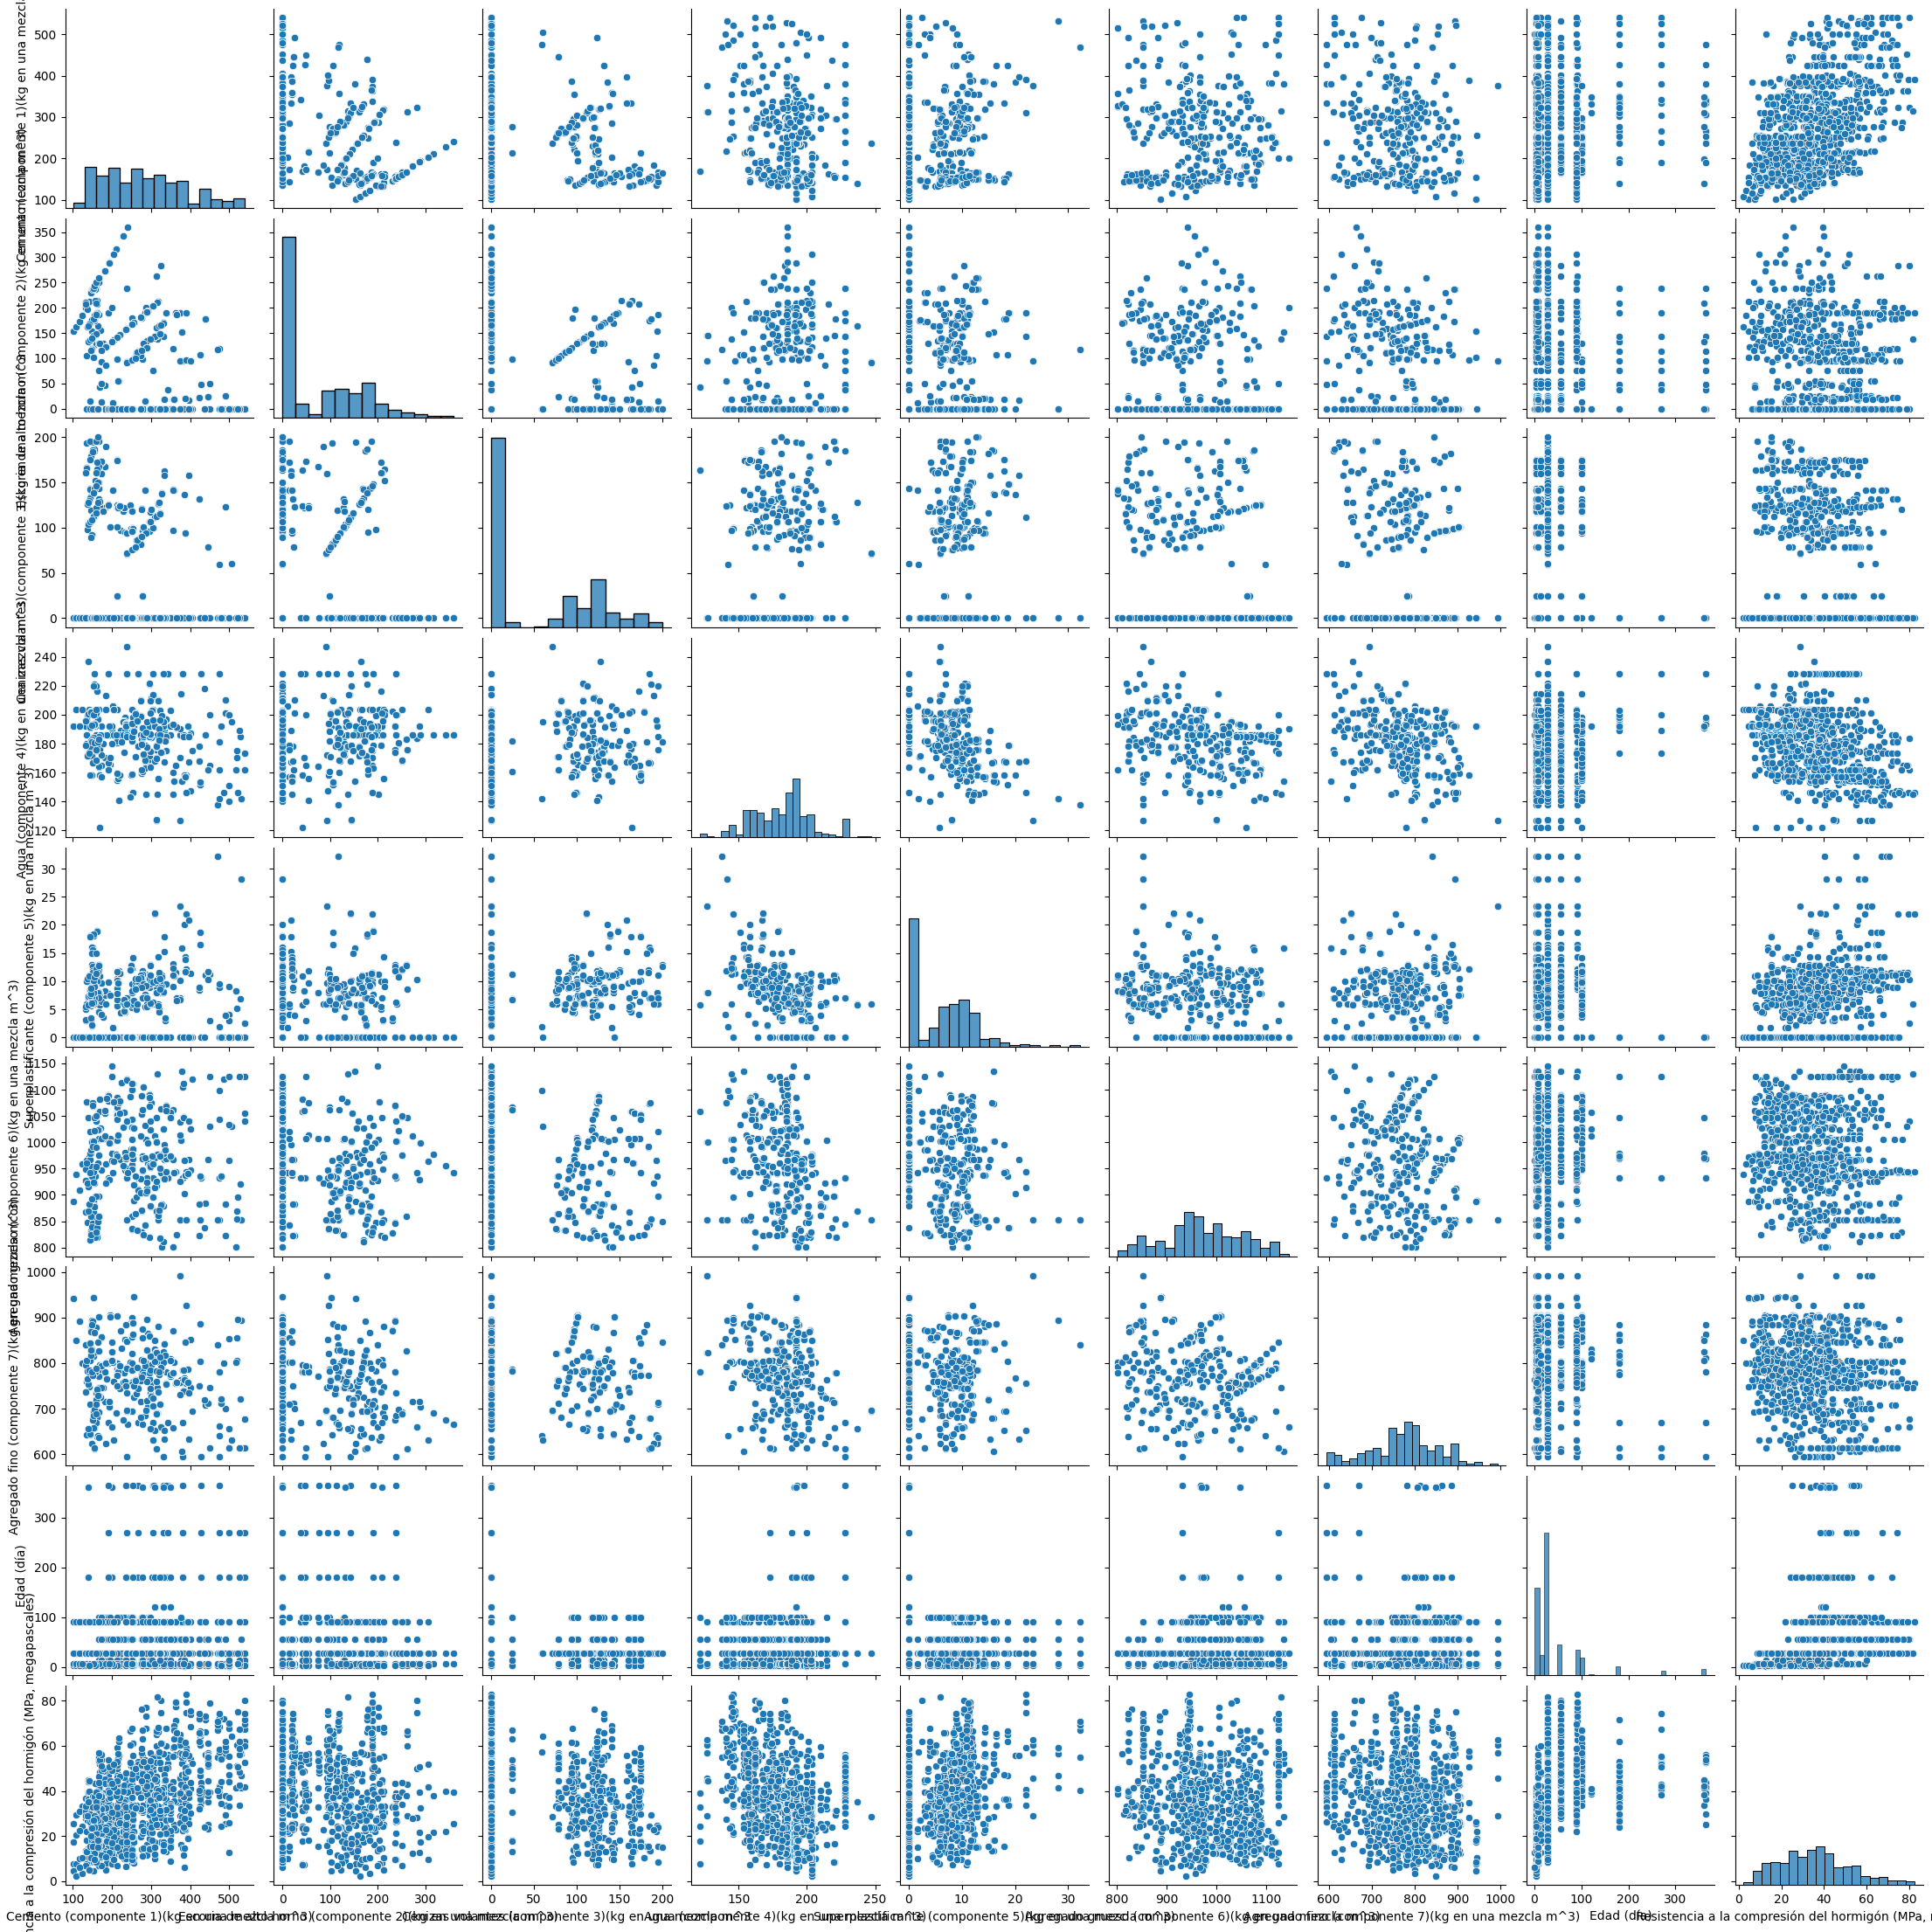

In [ ]:
#Matriz de comparaciòn entre variables
sns.pairplot(df)

## Grafico de disperción
Este fragmento de código se utiliza para crear un conjunto de gráficos de dispersión (scatter plots) entre una variable objetivo, que en este caso es "Resistencia a la compresión del hormigón (MPa, megapascales)," y las demás variables en el DataFrame "df."

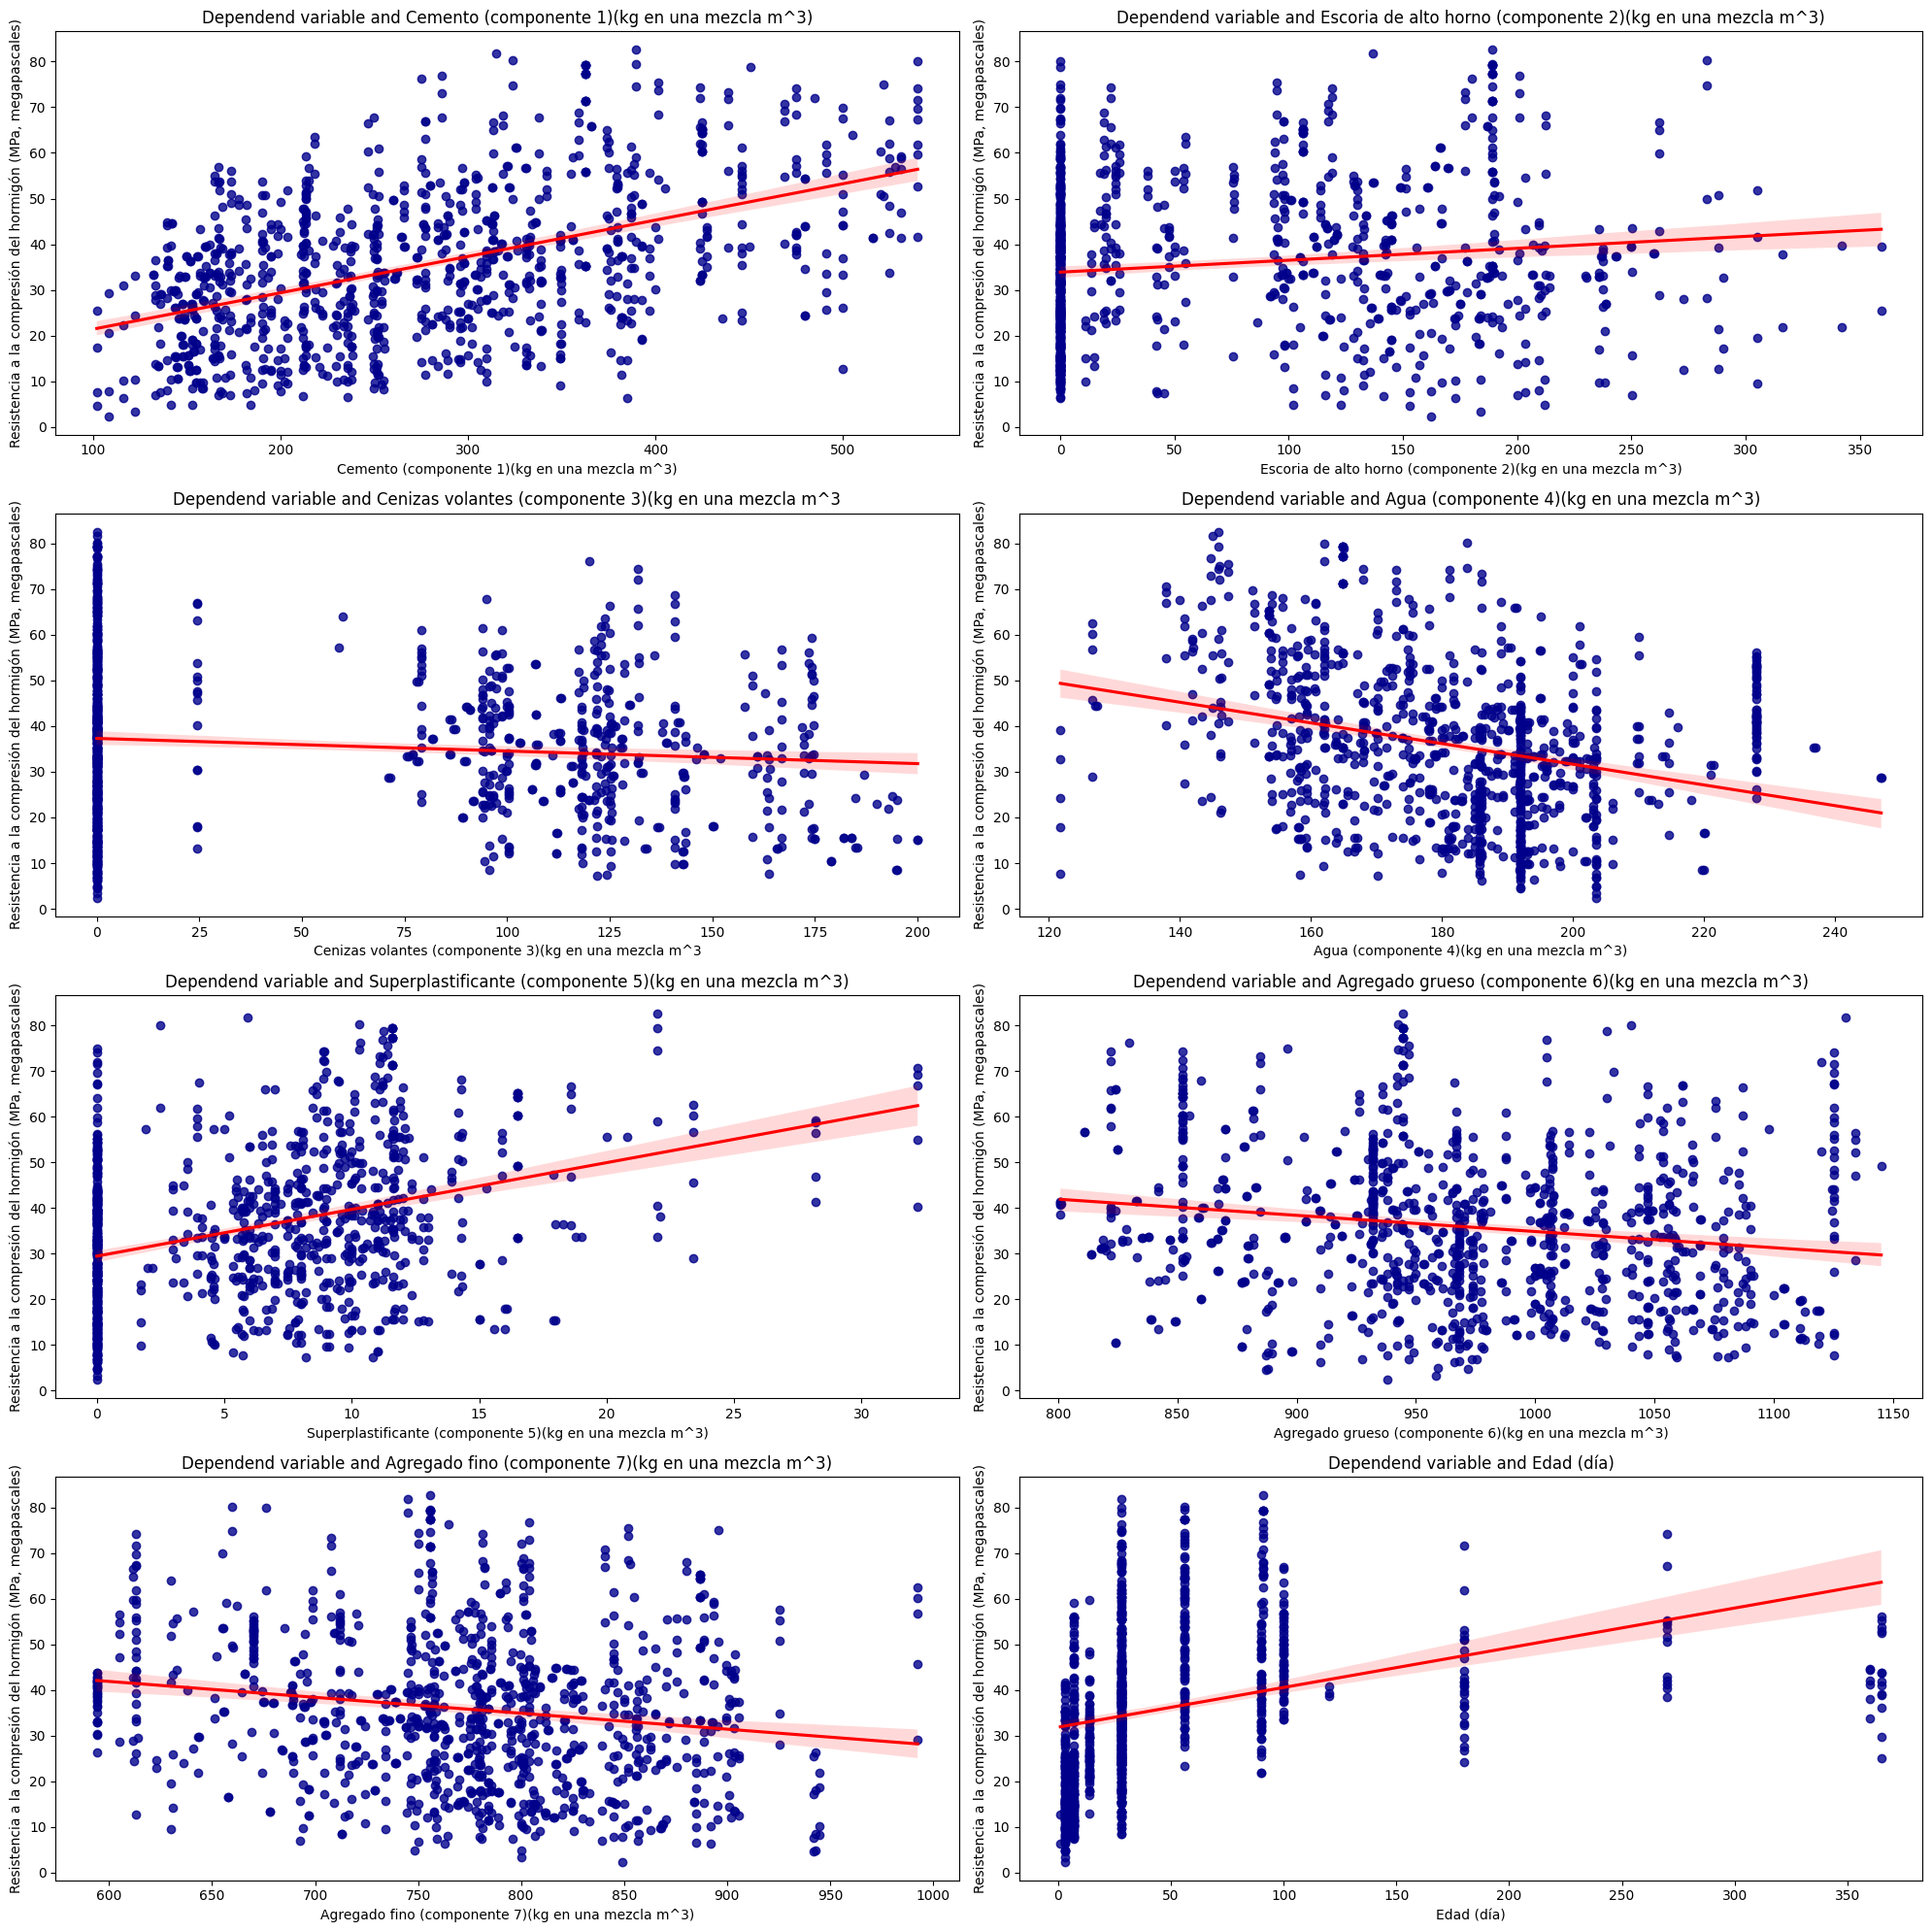

In [ ]:
# Relación entre variables numericas y nuestro target
n=1
plt.figure(figsize=(20,20))
for i in df.columns:
  if i == 'Resistencia a la compresión del hormigón (MPa, megapascales)':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x= df[i],y=  df['Resistencia a la compresión del hormigón (MPa, megapascales)'],scatter_kws={"color": "#00008B"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

Este gráfico de regresión muestra que algunas de nuestras características son lineales positivas y otras son lineales negativas en relación con nuestra variable objetivo.

In [ ]:
# Correlación entre el target y las variables
df.corr()['Resistencia a la compresión del hormigón (MPa, megapascales)'].sort_values(ascending=False)

Resistencia a la compresión del hormigón (MPa, megapascales)    1.000000
Cemento (componente 1)(kg en una mezcla m^3)                    0.497833
Superplastificante (componente 5)(kg en una mezcla m^3)         0.366102
Edad (día)                                                      0.328877
Escoria de alto horno (componente 2)(kg en una mezcla m^3)      0.134824
Cenizas volantes (componente 3)(kg en una mezcla m^3           -0.105753
Agregado grueso (componente 6)(kg en una mezcla m^3)           -0.164928
Agregado fino (componente 7)(kg en una mezcla m^3)             -0.167249
Agua (componente 4)(kg en una mezcla m^3)                      -0.289613
Name: Resistencia a la compresión del hormigón (MPa, megapascales), dtype: float64

<Axes: >

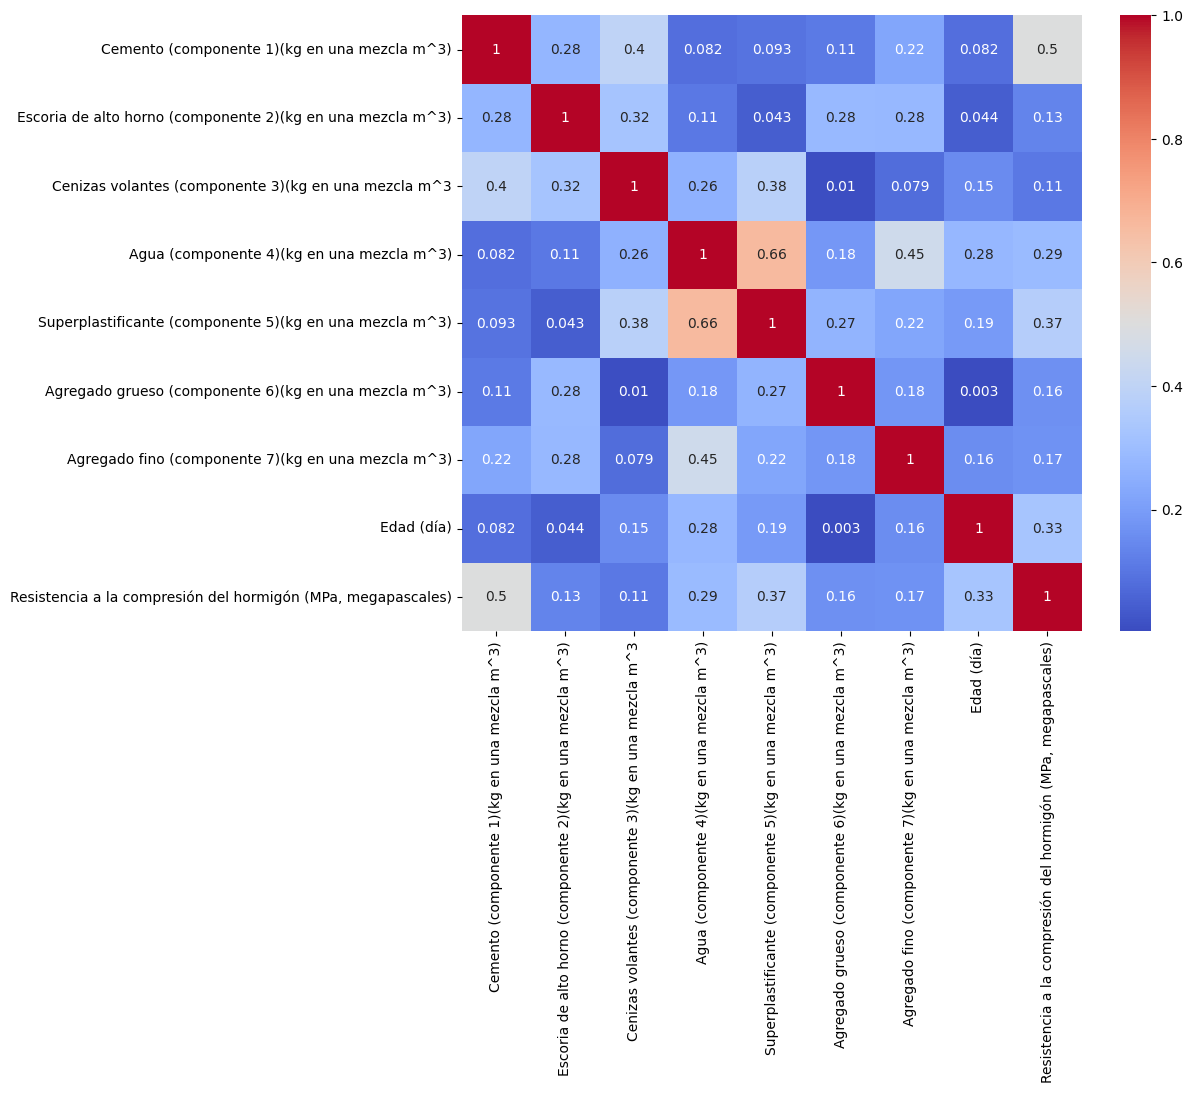

In [ ]:
# Mapa de multicorrelación entre las variables
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

Analisis con los estudiantes

# **Normalziación**

La normalización se refiere al proceso de ajustar los valores de una variable para que estén dentro de un rango específico o sigan una distribución particular. Hay varios tipos de normalización que se utilizan en diferentes contextos, dependiendo de los objetivos del análisis. Aquí hay algunos tipos comunes de normalización:

1. **Min-Max Scaling**: También conocida como escala lineal, esta técnica ajusta los valores de los datos para que estén dentro de un rango específico, generalmente entre 0 y 1. La fórmula general es:


2. **Z-Score Normalization (Standardization)**: Esta técnica transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es útil cuando deseas comparar valores en diferentes escalas y cuando asumes que los datos se distribuyen normalmente. La fórmula es:


3. **Robust Scaling**: Similar a la normalización Z-Score, pero en lugar de usar la desviación estándar, utiliza el rango intercuartil (IQR) para hacer que los datos sean resistentes a los valores atípicos.

4. **Log Transformation**: Transformar los datos mediante el logaritmo puede ayudar a reducir el sesgo y la variabilidad en los datos. Es útil cuando los datos tienen una distribución asimétrica.

5. **Box-Cox Transformation**: Es una familia de transformaciones que incluye la transformación logarítmica como un caso especial. La transformación de Box-Cox busca estabilizar la varianza y hacer que los datos se asemejen a una distribución normal.

6. **Sigmoidal / Min-Max Transformation**: En casos donde deseas que los datos sigan una distribución sigmoidal, puedes aplicar una transformación que aplana los valores extremos y distribuye los datos en un rango específico.

7. **Unit Vector Scaling**: En este enfoque, cada observación se escala dividiendo por su longitud Euclidiana, de modo que la observación resultante tenga una longitud (norma) igual a 1.

8. **Feature Scaling**: Cuando trabajas con algoritmos de aprendizaje automático que utilizan medidas de distancia o magnitudes, como K-Means o algoritmos basados en gradientes, a menudo es importante escalar las características de manera que tengan un rango comparable.

9. **Percentile Ranking**: Transformar los datos en rangos percentiles puede ayudar a comparar la posición relativa de los valores en lugar de los valores absolutos.

El tipo de normalización que debes usar depende del contexto y los objetivos de tu análisis. Cada tipo de normalización tiene sus propias ventajas y desventajas, y es importante elegir el enfoque adecuado para tus datos y necesidades.

In [ ]:
df_normalized = df.apply(lambda col: (col - col.min()) / (col.max() - col.min()))#Usaremos la normalización mas sencilla, investige en que casos se pueden aplicar las demas normalizaciones

**PARTICIÓN DEL DATASET**
aqui almacenamos los nuevos datos en la variable X
y usamos el metodo

```
iloc[:, 0:8]
```
".iloc[:, 0:8]": Este es un método de indexación que se aplica al DataFrame "df_normalized". Aquí se especifican dos partes importantes:

"iloc" se refiere a la indexación basada en la ubicación numérica de las filas y columnas en el DataFrame.
"[:, 0:8]" selecciona todas las filas (el ":" antes de la coma) y las columnas de la posición 0 a la posición 7 (el "0:8" después de la coma).


In [ ]:
X = df_normalized.drop(columns=['Resistencia a la compresión del hormigón (MPa, megapascales)','Superplastificante (componente 5)(kg en una mezcla m^3)'])
#X = df_normalized.iloc[:,0:8]
y = df_normalized.iloc[:,-1]

In [ ]:
X

,Cemento (componente 1)(kg en una mezcla m^3),Escoria de alto horno (componente 2)(kg en una mezcla m^3),Cenizas volantes (componente 3)(kg en una mezcla m^3,Agua (componente 4)(kg en una mezcla m^3),Agregado grueso (componente 6)(kg en una mezcla m^3),Agregado fino (componente 7)(kg en una mezcla m^3),Edad (día)
0,1.000000,0.000000,0.000000,0.321357,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.000000,0.321357,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.000000,0.848303,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848303,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560878,0.515698,0.580783,0.986264
...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.200872,0.437280,0.074176
1026,0.502740,0.000000,0.577711,0.592814,0.049128,0.550426,0.074176
1027,0.106164,0.387869,0.542729,0.566467,0.265698,0.466633,0.074176
1028,0.130365,0.519477,0.000000,0.429940,0.548256,0.488961,0.074176


In [ ]:
y

0       0.967445
1       0.741964
2       0.472642
3       0.482400
4       0.522806
          ...   
1025    0.522660
1026    0.359386
1027    0.266170
1028    0.379185
1029    0.374616
Name: Resistencia a la compresión del hormigón (MPa, megapascales), Length: 1030, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)


In [ ]:
df_normalized

,Cemento (componente 1)(kg en una mezcla m^3),Escoria de alto horno (componente 2)(kg en una mezcla m^3),Cenizas volantes (componente 3)(kg en una mezcla m^3,Agua (componente 4)(kg en una mezcla m^3),Superplastificante (componente 5)(kg en una mezcla m^3),Agregado grueso (componente 6)(kg en una mezcla m^3),Agregado fino (componente 7)(kg en una mezcla m^3),Edad (día),"Resistencia a la compresión del hormigón (MPa, megapascales)"
0,1.000000,0.000000,0.000000,0.321357,0.077640,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.000000,0.321357,0.077640,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.000000,0.560878,0.000000,0.515698,0.580783,0.986264,0.522806
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.276398,0.200872,0.437280,0.074176,0.522660
1026,0.502740,0.000000,0.577711,0.592814,0.322981,0.049128,0.550426,0.074176,0.359386
1027,0.106164,0.387869,0.542729,0.566467,0.189441,0.265698,0.466633,0.074176,0.266170
1028,0.130365,0.519477,0.000000,0.429940,0.350932,0.548256,0.488961,0.074176,0.379185




```
# Esto tiene formato de código
```

# **IMPLEMENTACIÓN Y SELECCIÓN DEL MODELO**

Tiempo de Entrenamiento - Modelo de Regresión Lineal: 0.0047228336334228516 segundos
El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.6062731843232375
El score para el modelo de regresión lineal y los datos de validación es: 0.6262606265496004
Tiempo de Predicción - Modelo de Regresión Lineal: 0.00136566162109375 segundos
MAE : 0.09608508469924287
MSE : 0.014947646684956269
RMSE : 0.12226056880677542
R2 : 0.6262606265496004


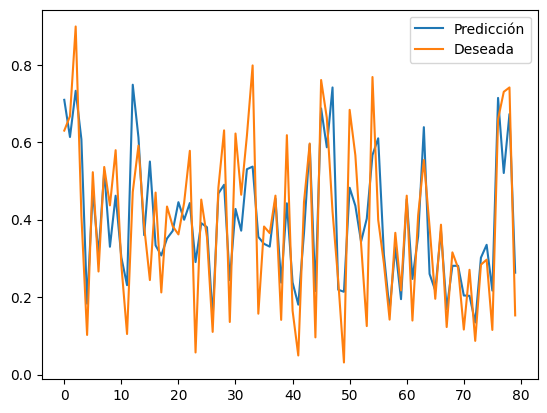

In [ ]:
#Implementación del modelo de regresión lineal multiparametrico
from sklearn.linear_model import LinearRegression
import time

Linear = LinearRegression()


# Iniciar el contador de tiempo para el modelo de regresión lineal
start_time_training_M = time.time()

# Implementación del modelo de regresión lineal multiparamétrico

Linear.fit(X_train,y_train)

# Calcular el tiempo de entrenamiento del modelo lineal
training_time_linear_M = time.time() - start_time_training_M

# Imprimir el tiempo de entrenamiento
print("Tiempo de Entrenamiento - Modelo de Regresión Lineal:", training_time_linear_M, "segundos")


Score_training_L = Linear.score(X_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training_L))
Score_test_L= Linear.score(X_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test_L))


# Realizar predicciones y calcular métricas
start_time_prediction_M = time.time()
#Metricas
y_pred = Linear.predict(X_test)

# Calcular el tiempo de predicción
prediction_time_linear_M = time.time() - start_time_prediction_M

# Imprimir el tiempo de predicción
print("Tiempo de Predicción - Modelo de Regresión Lineal:", prediction_time_linear_M, "segundos")


MAE_L  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE_L)

MSE_L  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE_L)

RMSE_L = np.sqrt(MSE_L)
print("RMSE :" ,RMSE_L)

r2_L = r2_score(y_test,y_pred)
print("R2 :" ,r2_L)

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicción","Deseada"])
plt.show()



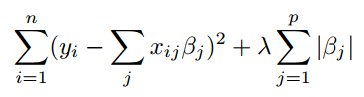

Tiempo de Entrenamiento - Modelo de Regresión Lineal: 0.011368751525878906 segundos
El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.9068343004007559
El score para el modelo de regresión lineal y los datos de validación es: 0.8334652372678559
Tiempo de Predicción - Modelo de Regresión Lineal: 0.0017654895782470703 segundos
MAE : 0.06277290217427961
MSE : 0.006660531297790805
RMSE : 0.08161207813669986
R2 : 0.8334652372678559


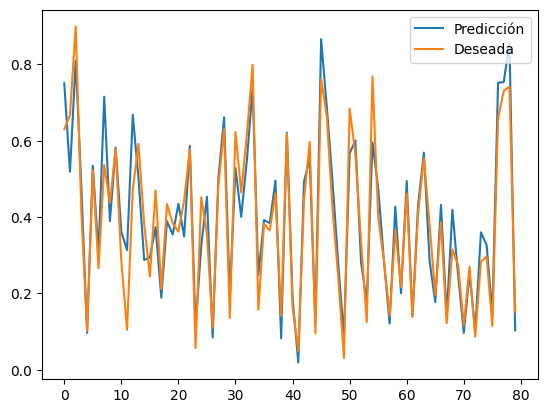

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import time

poly = PolynomialFeatures(3) #crear una variable de grado 3
poly_X_train = poly.fit_transform(X_train) # encajar el juego de trenes
poly_X_test = poly.transform(X_test) #transformar el conjunto de pruebas

linear_poly = LinearRegression()


# Iniciar el contador de tiempo para el modelo de regresión lineal
start_time_training_P = time.time()


linear_poly.fit(poly_X_train,y_train)

# Calcular el tiempo de entrenamiento del modelo lineal
training_time_linear_P = time.time() - start_time_training_P

# Imprimir el tiempo de entrenamiento
print("Tiempo de Entrenamiento - Modelo de Regresión Lineal:", training_time_linear_P, "segundos")


Score_training_P = linear_poly.score(poly_X_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training_P))
Score_test_P= linear_poly.score(poly_X_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test_P))

# Realizar predicciones y calcular métricas
start_time_prediction_P = time.time()

#Metricas
y_pred = linear_poly.predict(poly_X_test)

# Calcular el tiempo de predicción
prediction_time_linear_P = time.time() - start_time_prediction_P

# Imprimir el tiempo de predicción
print("Tiempo de Predicción - Modelo de Regresión Lineal:", prediction_time_linear_P, "segundos")


MAE_P  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE_P)

MSE_P  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE_P)

RMSE_P = np.sqrt(MSE_P)
print("RMSE :" ,RMSE_P)

r2_P = r2_score(y_test,y_pred)
print("R2 :" ,r2_P)

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicción","Deseada"])
plt.show()




---



In [ ]:
# Comparar los resultados
print("Comparacion de resultados")
print("Resultados del Modelo de Regresión Lineal Multiparametrica:")
print("MSE:", MSE_L)
print("R²:", r2_L)
print("MAE:", MAE_L)
print("Tiempo de Entrenamiento - Modelo de Regresión Lineal:", training_time_linear_M, "segundos")
print("Tiempo de Predicción - Modelo de Regresión Lineal:", prediction_time_linear_M, "segundos")

print("\nResultados del Modelo de Regresión Lineal Polinómica:")
print("MSE:", MSE_P)
print("R²:", r2_P)
print("MAE:", MAE_P)
print("Tiempo de Entrenamiento - Modelo de Regresión Lineal:", training_time_linear_P, "segundos")
print("Tiempo de Predicción - Modelo de Regresión Lineal:", prediction_time_linear_P, "segundos")

Comparacion de resultados
Resultados del Modelo de Regresión Lineal Multiparametrica:
MSE: 0.014947646684956269
R²: 0.6262606265496004
MAE: 0.09608508469924287
Tiempo de Entrenamiento - Modelo de Regresión Lineal: 0.0047228336334228516 segundos
Tiempo de Predicción - Modelo de Regresión Lineal: 0.00136566162109375 segundos

Resultados del Modelo de Regresión Lineal Polinómica:
MSE: 0.006660531297790805
R²: 0.8334652372678559
MAE: 0.06277290217427961
Tiempo de Entrenamiento - Modelo de Regresión Lineal: 0.011368751525878906 segundos
Tiempo de Predicción - Modelo de Regresión Lineal: 0.0017654895782470703 segundos


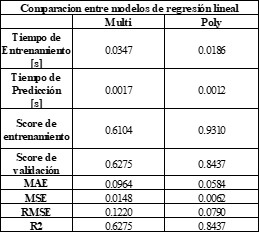
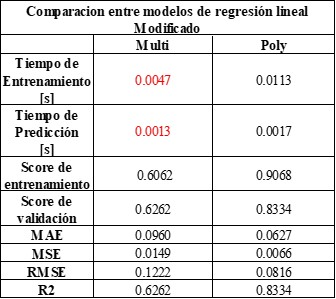

In [ ]:
#pip install statsmodels



# Hipotesis

*   La cantidad de cemento en una mezcla de hormigón tiene una influencia positiva en la resistencia a la compresión, ya que más cemento suele dar como resultado un hormigón más fuerte.

*   El uso de un superplastificante puede aumentar la resistencia a la compresión al mejorar la trabajabilidad del hormigón, lo que permite una mejor compactación.

*   La edad del hormigón podría tener una influencia en su resistencia, ya que el tiempo de fraguado y endurecimiento podría afectar sus propiedades mecánicas.




In [ ]:
#Validación usando Correlación
#Si muestros valores de correlación son positivos y relativamente altos,
#es una primera indicación de que esas características podrían influir positivamente en la resistencia a la compresión.
correlations = df_normalized.corr()['Resistencia a la compresión del hormigón (MPa, megapascales)']
print(correlations[['Cemento (componente 1)(kg en una mezcla m^3)', 'Superplastificante (componente 5)(kg en una mezcla m^3)', 'Edad (día)']])


Cemento (componente 1)(kg en una mezcla m^3)               0.497833
Superplastificante (componente 5)(kg en una mezcla m^3)    0.366102
Edad (día)                                                 0.328877
Name: Resistencia a la compresión del hormigón (MPa, megapascales), dtype: float64


In [ ]:
#Validación usando Coeficientes del Modelo
#Si los coeficientes son positivos, indica que un aumento en esa característica lleva a un
#aumento en la resistencia a la compresión, validando así nuestra hipótesis.
coefs = Linear.coef_
for feature, coef in zip(['Cemento (componente 1)(kg en una mezcla m^3)', 'Superplastificante (componente 5)(kg en una mezcla m^3)', 'Edad (día)'], coefs):
    print(f'Coeficiente para {feature}: {coef}')


Coeficiente para Cemento (componente 1)(kg en una mezcla m^3): 0.6483669642778571
Coeficiente para Superplastificante (componente 5)(kg en una mezcla m^3): 0.48534364758088006
Coeficiente para Edad (día): 0.21804922673869698


In [ ]:
#Validación usando Predicciones
#Probemos cómo cambia la resistencia predicha cuando tenemos valores mínimos y
#máximos para las tres características:
min_values = df_normalized[['Agregado grueso (componente 6)(kg en una mezcla m^3)', 'Agua (componente 4)(kg en una mezcla m^3)', 'Cenizas volantes (componente 3)(kg en una mezcla m^3', 'Cemento (componente 1)(kg en una mezcla m^3)', 'Superplastificante (componente 5)(kg en una mezcla m^3)', 'Edad (día)', 'Resistencia a la compresión del hormigón (MPa, megapascales)', 'Escoria de alto horno (componente 2)(kg en una mezcla m^3)']].min().values.reshape(1,-1)
max_values = df_normalized[['Agregado grueso (componente 6)(kg en una mezcla m^3)', 'Agua (componente 4)(kg en una mezcla m^3)', 'Cenizas volantes (componente 3)(kg en una mezcla m^3', 'Cemento (componente 1)(kg en una mezcla m^3)', 'Superplastificante (componente 5)(kg en una mezcla m^3)', 'Edad (día)', 'Resistencia a la compresión del hormigón (MPa, megapascales)', 'Escoria de alto horno (componente 2)(kg en una mezcla m^3)']].max().values.reshape(1,-1)

pred_min = Linear.predict(min_values)
pred_max = Linear.predict(max_values)

print(f'Predicción con valores mínimos: {pred_min[0]}')
print(f'Predicción con valores máximos: {pred_max[0]}')

#Si la predicción con los valores máximos es mayor que con los valores mínimos, esto respalda nuestra hipótesis.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# Importa la librería necesaria
import numpy as np
import statsmodels.api as sm

# Obtén los coeficientes del modelo de regresión lineal
coeficientes_lineal = Linear.coef_
X_train_constant = sm.add_constant(X_train)

# Muestra los coeficientes junto con el nombre de las características
nombres_caracteristicas = ['Cemento', 'Superplastificante', 'Edad']
# Crea y ajusta un modelo de regresión lineal con statsmodels
model = sm.OLS(y_train, X_train_constant).fit()

# Itera a través de los coeficientes y sus nombres de características correspondientes
for coef, caracteristica in zip(coeficientes_lineal, nombres_caracteristicas):
    print(f'Coeficiente para {caracteristica}: {coef}')

# Realiza una interpretación de los coeficientes
print("\nInterpretación de los coeficientes:")
print("===================================")
print(f"Un incremento de 1 unidad en Cemento está asociado con un aumento de {coeficientes_lineal[0]:.2f} unidades en la resistencia a la compresión.")
print(f"Un incremento de 1 unidad en Superplastificante está asociado con un aumento de {coeficientes_lineal[1]:.2f} unidades en la resistencia a la compresión.")
print(f"Un incremento de 1 unidad en Edad está asociado con un aumento de {coeficientes_lineal[2]:.2f} unidades en la resistencia a la compresión.")

# Comprueba si los coeficientes son estadísticamente significativos
p_values = model.pvalues

print("\nP-Values de los coeficientes:")
print("==============================")
for p_value, caracteristica in zip(p_values, nombres_caracteristicas):
    print(f'P-Value para {caracteristica}: {p_value}')

# Realiza una interpretación de los P-Values
print("\nInterpretación de los P-Values:")
print("================================")
alpha = 0.05  # Nivel de significancia
for p_value, caracteristica in zip(p_values, nombres_caracteristicas):
    if p_value < alpha:
        print(f'El P-Value para {caracteristica} es menor que {alpha}, por lo que el coeficiente es estadísticamente significativo.')
    else:
        print(f'El P-Value para {caracteristica} no es significativo a un nivel de {alpha}, por lo que el coeficiente podría no ser confiable.')

# Realiza una interpretación global del modelo
print("\nInterpretación Global:")
print("=======================")
print("El modelo de regresión lineal sugiere que la cantidad de cemento y la edad del hormigón tienen un impacto significativo en la resistencia a la compresión. Sin embargo, la cantidad de superplastificante podría no ser un predictor confiable según los P-Values.")


Coeficiente para Cemento: 0.649218873620421
Coeficiente para Superplastificante: 0.48589206199045404
Coeficiente para Edad: 0.20483934142761795

Interpretación de los coeficientes:
Un incremento de 1 unidad en Cemento está asociado con un aumento de 0.65 unidades en la resistencia a la compresión.
Un incremento de 1 unidad en Superplastificante está asociado con un aumento de 0.49 unidades en la resistencia a la compresión.
Un incremento de 1 unidad en Edad está asociado con un aumento de 0.20 unidades en la resistencia a la compresión.

P-Values de los coeficientes:
P-Value para Cemento: 0.46534631834542495
P-Value para Superplastificante: 9.336513897068964e-34
P-Value para Edad: 1.0611002470398962e-20

Interpretación de los P-Values:
El P-Value para Cemento no es significativo a un nivel de 0.05, por lo que el coeficiente podría no ser confiable.
El P-Value para Superplastificante es menor que 0.05, por lo que el coeficiente es estadísticamente significativo.
El P-Value para Edad es 

# Interpretación de los Coeficientes:

Se examina los coeficientes de las características relevantes de la
hipótesis (Cemento, Superplastificante y Edad) en ambos modelos.
Se comprueba si los coeficientes son positivos o negativos y si son estadísticamente significativos. Un coeficiente positivo indica una relación positiva, mientras que uno negativo indica una relación negativa.
Se evalúa la magnitud de los coeficientes para determinar la fuerza de la relación.

# Conclusiones:

Compara los resultados de los modelos con tu hipótesis original. ¿Los coeficientes de las características seleccionadas coinciden con lo que esperabas según tu hipótesis?
Si los resultados son coherentes con tu hipótesis, puedes considerarla respaldada por los datos.
Si los resultados difieren de tu hipótesis, podrías revisar tu enfoque o buscar explicaciones adicionales.
Recuerda que la comprobación de hipótesis en un contexto de regresión implica evaluar la relación entre las características y la variable objetivo en función de los coeficientes del modelo. Este análisis te ayudará a comprender cómo las variables influyen en la resistencia a la compresión del hormigón según los datos que tienes.

# **puntos adcionales**

In [ ]:
def compute_cost(X, y, theta):
    '''Calcula el costo de la función de hipótesis'''
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    return 1/(2*m) * np.sum(square_err)

def gradient_descent(X, y, theta, alpha, num_iters):
    '''Implementa el descenso de gradiente para optimizar theta'''
    m = len(y)
    J_history = []

    for _ in range(num_iters):


        gradients = np.array([[1, 2], [3, 4]])
        gradients = (1/m) * (X.T.dot(X.dot(theta) - y))
        gradients = gradients.flatten()
        alpha = 0.01

        theta -= alpha * gradients
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Suponemos que X_train y y_train ya han sido definidos y normalizados

X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # Agrega x0=1 a cada instancia
theta_initial = np.random.randn(X_b.shape[1],1)  # Inicializa theta aleatoriamente
alpha = 0.01  # Tasa de aprendizaje
iterations = 1000  # Número de iteraciones

theta_optimized, cost_history = gradient_descent(X_b, y_train, theta_initial, alpha, iterations)

# Puedes graficar cost_history para ver cómo cambia el costo con las iteraciones
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function using Gradient Descent')


ValueError: ignored

Theta óptimo: [0.20326477 0.25416179 0.1122391  0.01772776 0.01282289 0.14812052
 0.03447743 0.03447291 0.12319745]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

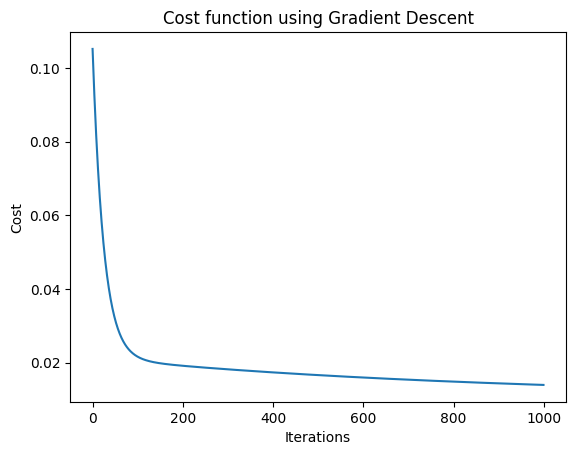

In [ ]:
import numpy as np

def calcular_costo(X, y, theta, lambda_reg):
    m = len(y)
    h = X.dot(theta)
    error = h - y
    costo = (1/(2*m)) * np.sum(error**2)
    costo_reg = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)  # No incluimos el primer término (theta_0)
    return costo + costo_reg

def calcular_gradiente(X, y, theta, lambda_reg):
    m = len(y)
    h = X.dot(theta)
    error = h - y
    regularizacion = lambda_reg / m * theta
    regularizacion[0] = 0
    gradients = (1/m) * X.T.dot(error) + regularizacion
    return gradients

def gradiente_descendente(X, y, alpha, num_iteraciones, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n)
    historial_costos = []

    for i in range(num_iteraciones):
        gradiente = calcular_gradiente(X, y, theta, lambda_reg)
        theta -= alpha * gradiente
        costo = calcular_costo(X, y, theta, lambda_reg)
        historial_costos.append(costo)

    return theta, historial_costos

# Prueba

# Añadimos una columna de unos al inicio de X para el término de sesgo
m = len(y)
X_b = np.c_[np.ones((m, 1)), X]

alpha = 0.01
num_iteraciones = 1000
lambda_reg = 1.0

theta_optimo, historial_costos = gradiente_descendente(X_b, y, alpha, num_iteraciones, lambda_reg)

print("Theta óptimo:", theta_optimo)
# Puedes graficar cost_history para ver cómo cambia el costo con las iteraciones
plt.plot(historial_costos)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function using Gradient Descent')
